# k-Nearest Neighbor (KNN) classification on the CIFAR-10 dataset using Manhattan and Euclidean distances

It also implements 5-fold cross-validation and generates a graph showing the midpoint accuracies for the two distance measures.Code is written on Python version 3.10 

Importing libraries and installed some packages via pip installation in the environment

In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

Selecting categories from the sub folder which has labels of the categories from the root folder train and also storing the training data in TRAIN_DATA as a list from TRAIN_DIR variable directory using OpenCV's imread() function and stores each image as a numpy array along with its corresponding class label in a list named TRAIN_DATA.

In [2]:
TRAIN_DIR = 'C:/Users/aliah/CIFAR-10-images-master/train'
CATEGORIES = os.listdir(TRAIN_DIR)
print(CATEGORIES)

TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 20560.37it/s]

50000


The images and labels are shuffled randomly using the random.shuffle() function. A subset of 50 images with their corresponding labels are displayed using matplotlib's imshow() function.

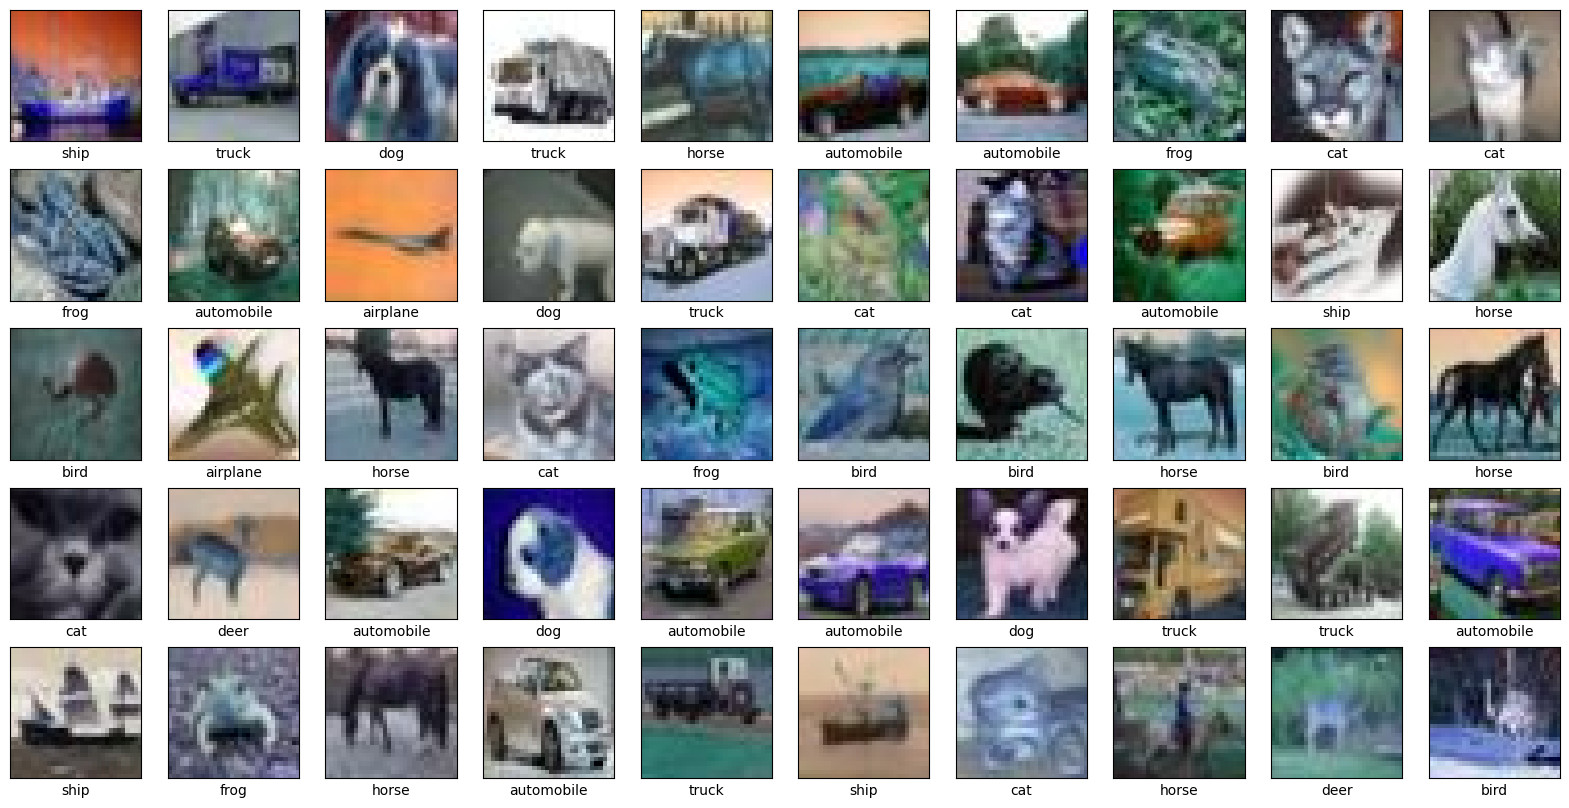

In [3]:
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i == 49:
        break
plt.show()

Next, the TRAIN_DATA list is split into 5 folds and for each fold, the KNN algorithm is trained on the data from the remaining four folds and tested on the remaining fold where values of k are 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 to give a k=20 view in the graph. The KNN algorithm uses the L1 (Manhattan) and L2 (Euclidean) distances to compute the distances between each test image and all the training images. The k-Nearest neighbors are then selected based on the computed distances, and the class label of the test image is predicted by taking the majority vote among the labels of the k-Nearest neighbors. Here manhattan_distance, euclidean_distance and knn fucntion is defined with their respective operations inside the function.

In [4]:
K_VALUES = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

FOLDS = [
    TRAIN_DATA[0:1000],
    TRAIN_DATA[1000:2000],
    TRAIN_DATA[2000:3000],
    TRAIN_DATA[3000:4000],
    TRAIN_DATA[4000:5000]
]

# Define functions to compute distances
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn(train, test, k, distance):
    predictions = []
    for x_test in tqdm(test):
        distances = []
        for x_train in train:
            dist = distance(x_test[0], x_train[0])
            distances.append((dist, x_train[1]))
        sorted_distances = sorted(distances, key=lambda x: x[0])[:k]
        k_nearest = [s[1] for s in sorted_distances]
        prediction = max(set(k_nearest), key=k_nearest.count)
        predictions.append(prediction)
    return predictions

# Perform cross validation for each fold and distance #ID -> 20-42378-1
fold_accuracies = []
distances = [manhattan_distance, euclidean_distance]

for distance in distances:
    fold_accuracies_dist = []
    for i in range(len(FOLDS)):
        validation = FOLDS[i]
        train = []
        for j in range(len(FOLDS)):
            if i != j:
                train += FOLDS[j]
        fold_accuracies_k = []
        for k in K_VALUES:
            predictions = knn(train, validation, k, distance)
            accuracy = sum([1 for i in range(len(predictions)) if predictions[i] == validation[i][1]]) / len(predictions)
            fold_accuracies_k.append(accuracy)
            print(f"Fold {i}, k = {k}, {distance.__name__} accuracy = {accuracy * 100:.2f}%")
        fold_accuracies_dist.append(fold_accuracies_k)
    fold_accuracies.append(fold_accuracies_dist)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.90it/s]


Fold 0, k = 1, manhattan_distance accuracy = 22.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.04it/s]


Fold 0, k = 3, manhattan_distance accuracy = 22.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 0, k = 5, manhattan_distance accuracy = 23.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.98it/s]


Fold 0, k = 7, manhattan_distance accuracy = 24.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.92it/s]


Fold 0, k = 9, manhattan_distance accuracy = 24.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.92it/s]


Fold 0, k = 11, manhattan_distance accuracy = 22.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.91it/s]


Fold 0, k = 13, manhattan_distance accuracy = 23.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.94it/s]


Fold 0, k = 15, manhattan_distance accuracy = 23.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.01it/s]


Fold 0, k = 17, manhattan_distance accuracy = 23.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 0, k = 19, manhattan_distance accuracy = 23.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.01it/s]


Fold 1, k = 1, manhattan_distance accuracy = 19.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Fold 1, k = 3, manhattan_distance accuracy = 20.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.03it/s]


Fold 1, k = 5, manhattan_distance accuracy = 21.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.98it/s]


Fold 1, k = 7, manhattan_distance accuracy = 21.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Fold 1, k = 9, manhattan_distance accuracy = 22.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.16it/s]


Fold 1, k = 11, manhattan_distance accuracy = 22.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 1, k = 13, manhattan_distance accuracy = 22.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.04it/s]


Fold 1, k = 15, manhattan_distance accuracy = 21.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 1, k = 17, manhattan_distance accuracy = 22.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.97it/s]


Fold 1, k = 19, manhattan_distance accuracy = 22.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 2, k = 1, manhattan_distance accuracy = 22.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.02it/s]


Fold 2, k = 3, manhattan_distance accuracy = 22.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Fold 2, k = 5, manhattan_distance accuracy = 22.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.09it/s]


Fold 2, k = 7, manhattan_distance accuracy = 23.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.10it/s]


Fold 2, k = 9, manhattan_distance accuracy = 23.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.01it/s]


Fold 2, k = 11, manhattan_distance accuracy = 22.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.04it/s]


Fold 2, k = 13, manhattan_distance accuracy = 22.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.07it/s]


Fold 2, k = 15, manhattan_distance accuracy = 23.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.07it/s]


Fold 2, k = 17, manhattan_distance accuracy = 22.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.08it/s]


Fold 2, k = 19, manhattan_distance accuracy = 21.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.13it/s]


Fold 3, k = 1, manhattan_distance accuracy = 22.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.99it/s]


Fold 3, k = 3, manhattan_distance accuracy = 21.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.97it/s]


Fold 3, k = 5, manhattan_distance accuracy = 22.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 3, k = 7, manhattan_distance accuracy = 21.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.04it/s]


Fold 3, k = 9, manhattan_distance accuracy = 23.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 3, k = 11, manhattan_distance accuracy = 22.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.00it/s]


Fold 3, k = 13, manhattan_distance accuracy = 22.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.15it/s]


Fold 3, k = 15, manhattan_distance accuracy = 22.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.10it/s]


Fold 3, k = 17, manhattan_distance accuracy = 22.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.99it/s]


Fold 3, k = 19, manhattan_distance accuracy = 23.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.07it/s]


Fold 4, k = 1, manhattan_distance accuracy = 21.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.04it/s]


Fold 4, k = 3, manhattan_distance accuracy = 23.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 4, k = 5, manhattan_distance accuracy = 23.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.11it/s]


Fold 4, k = 7, manhattan_distance accuracy = 22.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 4, k = 9, manhattan_distance accuracy = 23.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Fold 4, k = 11, manhattan_distance accuracy = 22.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Fold 4, k = 13, manhattan_distance accuracy = 23.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.06it/s]


Fold 4, k = 15, manhattan_distance accuracy = 23.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.01it/s]


Fold 4, k = 17, manhattan_distance accuracy = 22.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.07it/s]


Fold 4, k = 19, manhattan_distance accuracy = 22.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.40it/s]


Fold 0, k = 1, euclidean_distance accuracy = 20.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.53it/s]


Fold 0, k = 3, euclidean_distance accuracy = 20.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.48it/s]


Fold 0, k = 5, euclidean_distance accuracy = 20.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.34it/s]


Fold 0, k = 7, euclidean_distance accuracy = 21.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 0, k = 9, euclidean_distance accuracy = 22.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.48it/s]


Fold 0, k = 11, euclidean_distance accuracy = 22.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 0, k = 13, euclidean_distance accuracy = 23.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 0, k = 15, euclidean_distance accuracy = 23.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.33it/s]


Fold 0, k = 17, euclidean_distance accuracy = 23.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


Fold 0, k = 19, euclidean_distance accuracy = 23.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.48it/s]


Fold 1, k = 1, euclidean_distance accuracy = 19.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.49it/s]


Fold 1, k = 3, euclidean_distance accuracy = 17.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


Fold 1, k = 5, euclidean_distance accuracy = 18.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.50it/s]


Fold 1, k = 7, euclidean_distance accuracy = 18.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 1, k = 9, euclidean_distance accuracy = 17.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 1, k = 11, euclidean_distance accuracy = 18.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


Fold 1, k = 13, euclidean_distance accuracy = 18.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.48it/s]


Fold 1, k = 15, euclidean_distance accuracy = 18.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.46it/s]


Fold 1, k = 17, euclidean_distance accuracy = 19.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 1, k = 19, euclidean_distance accuracy = 18.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.49it/s]


Fold 2, k = 1, euclidean_distance accuracy = 18.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.45it/s]


Fold 2, k = 3, euclidean_distance accuracy = 17.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


Fold 2, k = 5, euclidean_distance accuracy = 18.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.50it/s]


Fold 2, k = 7, euclidean_distance accuracy = 19.50%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.40it/s]


Fold 2, k = 9, euclidean_distance accuracy = 20.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.49it/s]


Fold 2, k = 11, euclidean_distance accuracy = 21.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.39it/s]


Fold 2, k = 13, euclidean_distance accuracy = 21.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.40it/s]


Fold 2, k = 15, euclidean_distance accuracy = 21.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.40it/s]


Fold 2, k = 17, euclidean_distance accuracy = 21.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.49it/s]


Fold 2, k = 19, euclidean_distance accuracy = 21.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.35it/s]


Fold 3, k = 1, euclidean_distance accuracy = 20.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.27it/s]


Fold 3, k = 3, euclidean_distance accuracy = 17.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.39it/s]


Fold 3, k = 5, euclidean_distance accuracy = 20.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 3, k = 7, euclidean_distance accuracy = 19.40%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.44it/s]


Fold 3, k = 9, euclidean_distance accuracy = 19.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.45it/s]


Fold 3, k = 11, euclidean_distance accuracy = 18.30%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.47it/s]


Fold 3, k = 13, euclidean_distance accuracy = 19.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.43it/s]


Fold 3, k = 15, euclidean_distance accuracy = 19.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.37it/s]


Fold 3, k = 17, euclidean_distance accuracy = 19.80%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 3, k = 19, euclidean_distance accuracy = 19.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.43it/s]


Fold 4, k = 1, euclidean_distance accuracy = 20.10%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 4, k = 3, euclidean_distance accuracy = 17.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.36it/s]


Fold 4, k = 5, euclidean_distance accuracy = 20.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 4, k = 7, euclidean_distance accuracy = 21.20%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.39it/s]


Fold 4, k = 9, euclidean_distance accuracy = 21.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.45it/s]


Fold 4, k = 11, euclidean_distance accuracy = 20.60%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.41it/s]


Fold 4, k = 13, euclidean_distance accuracy = 21.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.48it/s]


Fold 4, k = 15, euclidean_distance accuracy = 21.70%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]


Fold 4, k = 17, euclidean_distance accuracy = 20.90%


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.42it/s]

Fold 4, k = 19, euclidean_distance accuracy = 21.10%


The midpoint accuracies for each distance measure are also computed for each fold, which is the average of the minimum and maximum accuracies obtained for that distance measure over all k values. The midpoint accuracies are then plotted against the k values for both distance measures using matplotlib's plot() function.

In [22]:
# Compute midpoint accuracies for L1 and L2 distances
midpoint_l1_accuracies = []
midpoint_l2_accuracies = []

for i in range(len(FOLDS)):
    l1_accuracies = fold_accuracies[0][i]
    l2_accuracies = fold_accuracies[1][i]
    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)
    
    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)
    
    print("Midpoint L1 accuracy for Fold {} = {:.2f}%, Midpoint L2 accuracy for Fold {} = {:.2f}%".format(i, midpoint_l1_accuracy * 100, i, midpoint_l2_accuracy * 100))

Midpoint L1 accuracy for Fold 0 = 23.35%, Midpoint L2 accuracy for Fold 0 = 22.00%
Midpoint L1 accuracy for Fold 1 = 21.25%, Midpoint L2 accuracy for Fold 1 = 18.50%
Midpoint L1 accuracy for Fold 2 = 22.85%, Midpoint L2 accuracy for Fold 2 = 19.55%
Midpoint L1 accuracy for Fold 3 = 22.35%, Midpoint L2 accuracy for Fold 3 = 19.15%
Midpoint L1 accuracy for Fold 4 = 22.65%, Midpoint L2 accuracy for Fold 4 = 19.75%


Finally, the code displays the graph with the midpoint accuracies for the L1 and L2 distances where 5 folds has been performed to evaluate the performance of KNN classifier both for L1(1st) and L2(2nd) norms.

L1 accuracy
[0.219, 0.23, 0.234, 0.221, 0.23, 0.227, 0.232, 0.23, 0.225, 0.226]
L2 accuracy
[0.201, 0.176, 0.206, 0.212, 0.21, 0.206, 0.219, 0.217, 0.209, 0.211]


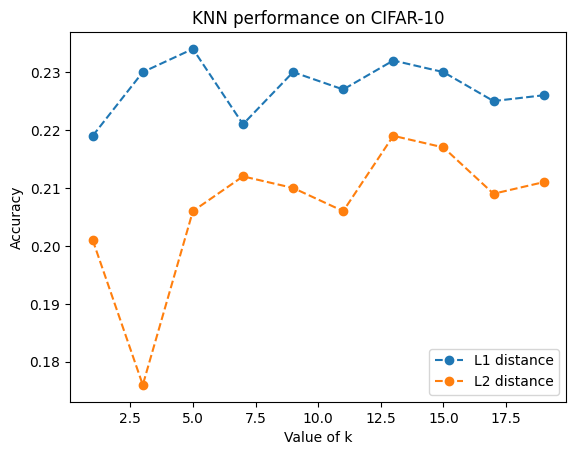

In [123]:
# Plotting the graph
#for j in K_VALUES:
  #accuracies_1 = l1_accuracies[j]
  #accuracies_2 = l2_accuracies[k] #ID -> 20-42378-1
  #plt.scatter([j] * len(l1_accuracies), l1_accuracies)
  #plt.scatter([j] * len(l2_accuracies), l2_accuracies)    
    
plt.plot(K_VALUES, l1_accuracies,'o--', label='L1 distance')
plt.plot(K_VALUES, l2_accuracies,'o--', label='L2 distance')
print("L1 accuracy")
print(l1_accuracies)
print("L2 accuracy")
print(l2_accuracies)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('KNN performance on CIFAR-10')
plt.legend()
plt.show()

For K values of 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 to give a k=20 view in the graph, L1 (Manhattan) 1st norm has had slight better accuracy over the L2 (Euclidean) 2nd norm distance in knn classifier implementation.